# Experiement: Round Two | 24%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_24.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  21578  18957       2     170    71.0    120     80            2     1   
1  19561  20547       2     162    73.0    120     80            1     1   
2   5796  18209       2     170    72.0    136    102            3     1   
3  30558  21894       1     162   100.0    130     90            3     1   
4  79930  20235       1     170    82.0    150    100            1     1   

   smoke  alco  active  cardio  
0      0     0       0       1  
1      0     0       1       1  
2      0     1       1       1  
3      0     0       1       1  
4      1     1       0       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45679 entries, 0 to 45678
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           45679 non-null  int64  
 1   age          45679 non-null  int64  
 2   gender       45679 non-null  int64  
 3   height       45679 non-null  int64  
 4   weight       45679 non-null  float64
 5   ap_hi        45679 non-null  int64  
 6   ap_lo        45679 non-null  int64  
 7   cholesterol  45679 non-null  int64  
 8   gluc         45679 non-null  int64  
 9   smoke        45679 non-null  int64  
 10  alco         45679 non-null  int64  
 11  active       45679 non-null  int64  
 12  cardio       45679 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.5 MB


0    34679
1    11000
Name: cardio, dtype: int64

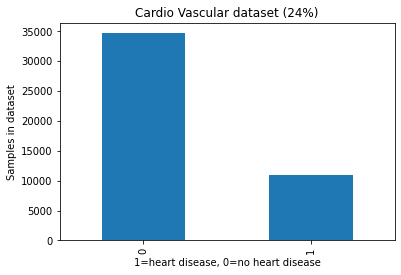

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (24%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 11000/45679 = 0,24081

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
2691   61966  22520       1     157    80.0    140     90            2     1   
8204   58055  22453       1     154    68.0    130     80            2     1   
19565  25178  19167       2     160    72.0    130     80            2     2   
20986  29097  19099       1     168    58.0    120     80            1     3   
42227  90033  18804       1     164    85.0    120     80            2     1   

       smoke  alco  active  
2691       0     0       0  
8204       0     0       1  
19565      0     0       0  
20986      0     0       1  
42227      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     27743
           1       0.60      0.13      0.21      8800

    accuracy                           0.77     36543
   macro avg       0.69      0.55      0.54     36543
weighted avg       0.73      0.77      0.71     36543



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      6936
           1       0.56      0.14      0.22      2200

    accuracy                           0.77      9136
   macro avg       0.67      0.55      0.54      9136
weighted avg       0.73      0.77      0.71      9136



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.741


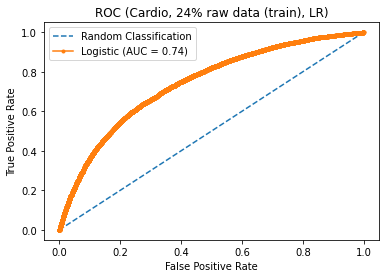

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.738


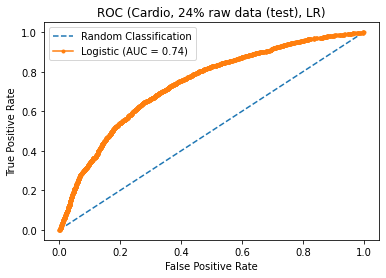

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     27743
           1       0.65      0.21      0.31      8800

    accuracy                           0.78     36543
   macro avg       0.72      0.59      0.59     36543
weighted avg       0.76      0.78      0.74     36543



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      6936
           1       0.61      0.20      0.30      2200

    accuracy                           0.78      9136
   macro avg       0.70      0.58      0.58      9136
weighted avg       0.75      0.78      0.73      9136



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.787


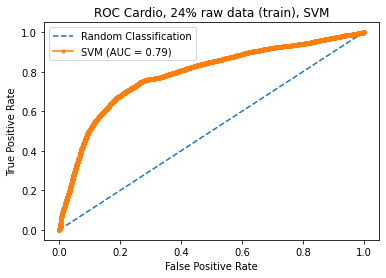

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


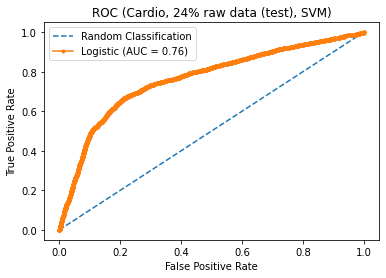

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.19435	validation_0-logloss:0.65180	validation_1-error:0.19691	validation_1-logloss:0.65202
[1]	validation_0-error:0.19325	validation_0-logloss:0.61812	validation_1-error:0.19702	validation_1-logloss:0.61855
[2]	validation_0-error:0.19279	validation_0-logloss:0.59044	validation_1-error:0.19243	validation_1-logloss:0.59089
[3]	validation_0-error:0.19216	validation_0-logloss:0.56716	validation_1-error:0.19089	validation_1-logloss:0.56767
[4]	validation_0-error:0.19251	validation_0-logloss:0.54772	validation_1-error:0.19166	validation_1-logloss:0.54829
[5]	validation_0-error:0.19227	validation_0-logloss:0.53140	validation_1-error:0.19144	validation_1-logloss:0.53202
[6]	validation_0-error:0.19303	validation_0-logloss:0.51753	validation_1-error:0.19100	validation_1-logloss:0.51824
[7]	validation_0-error:0.19279	validation_0-logloss:0.50552	validation_1-error:0.19122	validation_1-logloss:0.50631
[8]	validation_0-error:0.19281	validation_0-logloss:0.49532	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     27743
           1       0.63      0.50      0.56      8800

    accuracy                           0.81     36543
   macro avg       0.74      0.70      0.72     36543
weighted avg       0.80      0.81      0.80     36543



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6936
           1       0.62      0.51      0.56      2200

    accuracy                           0.81      9136
   macro avg       0.74      0.71      0.72      9136
weighted avg       0.80      0.81      0.80      9136



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.813


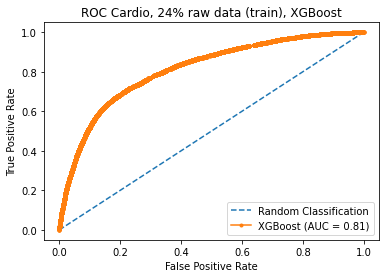

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.803


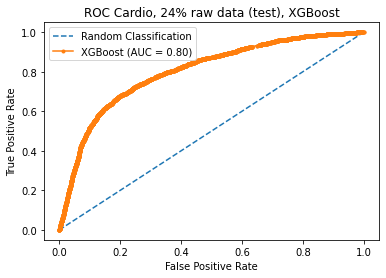

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
2691   61966  22520       1     157    80.0    140     90            2     1   
8204   58055  22453       1     154    68.0    130     80            2     1   
19565  25178  19167       2     160    72.0    130     80            2     2   
20986  29097  19099       1     168    58.0    120     80            1     3   
42227  90033  18804       1     164    85.0    120     80            2     1   

       smoke  alco  active  cardio  
2691       0     0       0       1  
8204       0     0       1       1  
19565      0     0       0       0  
20986      0     0       1       0  
42227      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

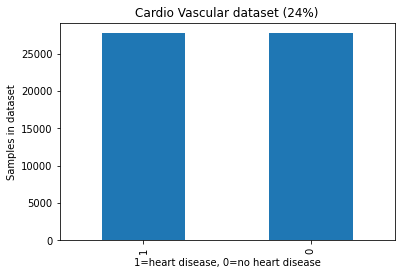

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (24%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72     27743
           1       0.73      0.69      0.71     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6936
           1       0.44      0.67      0.53      2200

    accuracy                           0.72      9136
   macro avg       0.66      0.70      0.67      9136
weighted avg       0.77      0.72      0.73      9136



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.778


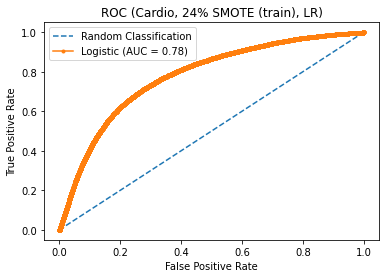

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.757


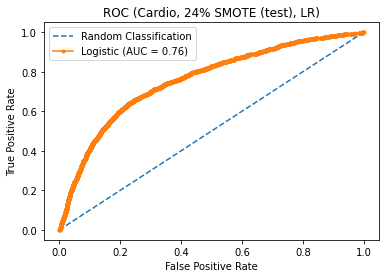

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     27743
           1       0.77      0.75      0.76     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.76     55486
weighted avg       0.76      0.76      0.76     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6936
           1       0.45      0.62      0.52      2200

    accuracy                           0.73      9136
   macro avg       0.66      0.69      0.67      9136
weighted avg       0.76      0.73      0.74      9136



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.834


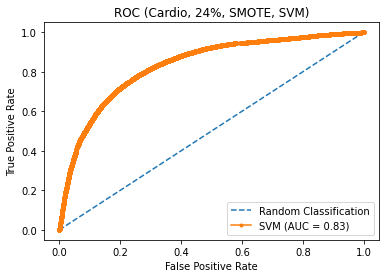

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.757


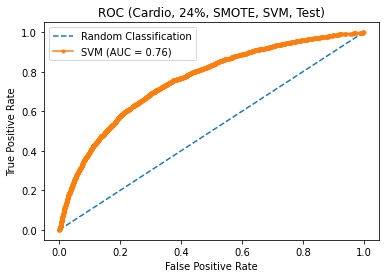

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21636	validation_0-logloss:0.65590	validation_1-error:0.24168	validation_1-logloss:0.66263
[1]	validation_0-error:0.21333	validation_0-logloss:0.62529	validation_1-error:0.23883	validation_1-logloss:0.63794
[2]	validation_0-error:0.21395	validation_0-logloss:0.59912	validation_1-error:0.23883	validation_1-logloss:0.61731
[3]	validation_0-error:0.21431	validation_0-logloss:0.57759	validation_1-error:0.23851	validation_1-logloss:0.60004
[4]	validation_0-error:0.21043	validation_0-logloss:0.55755	validation_1-error:0.23446	validation_1-logloss:0.58422
[5]	validation_0-error:0.21059	validation_0-logloss:0.54280	validation_1-error:0.23643	validation_1-logloss:0.57273
[6]	validation_0-error:0.20539	validation_0-logloss:0.52829	validation_1-error:0.22132	validation_1-logloss:0.56177
[7]	validation_0-error:0.20097	validation_0-logloss:0.51536	validation_1-error:0.22329	validation_1-logloss:0.55211
[8]	validation_0-error:0.19390	validation_0-logloss:0.50365	validation_1

[71]	validation_0-error:0.16977	validation_0-logloss:0.38621	validation_1-error:0.22034	validation_1-logloss:0.48215
[72]	validation_0-error:0.16975	validation_0-logloss:0.38594	validation_1-error:0.22067	validation_1-logloss:0.48214
[73]	validation_0-error:0.16977	validation_0-logloss:0.38549	validation_1-error:0.21990	validation_1-logloss:0.48207
[74]	validation_0-error:0.16972	validation_0-logloss:0.38493	validation_1-error:0.22012	validation_1-logloss:0.48205
[75]	validation_0-error:0.16977	validation_0-logloss:0.38472	validation_1-error:0.21990	validation_1-logloss:0.48207
[76]	validation_0-error:0.16961	validation_0-logloss:0.38434	validation_1-error:0.21990	validation_1-logloss:0.48198
[77]	validation_0-error:0.16938	validation_0-logloss:0.38365	validation_1-error:0.22001	validation_1-logloss:0.48159
[78]	validation_0-error:0.16909	validation_0-logloss:0.38307	validation_1-error:0.21979	validation_1-logloss:0.48131
[79]	validation_0-error:0.16927	validation_0-logloss:0.38271	val

[141]	validation_0-error:0.16127	validation_0-logloss:0.36354	validation_1-error:0.21530	validation_1-logloss:0.47785
[142]	validation_0-error:0.16116	validation_0-logloss:0.36322	validation_1-error:0.21486	validation_1-logloss:0.47771
[143]	validation_0-error:0.16118	validation_0-logloss:0.36304	validation_1-error:0.21519	validation_1-logloss:0.47771
[144]	validation_0-error:0.16078	validation_0-logloss:0.36235	validation_1-error:0.21508	validation_1-logloss:0.47754
[145]	validation_0-error:0.16085	validation_0-logloss:0.36221	validation_1-error:0.21541	validation_1-logloss:0.47762
[146]	validation_0-error:0.16073	validation_0-logloss:0.36175	validation_1-error:0.21497	validation_1-logloss:0.47730
[147]	validation_0-error:0.16058	validation_0-logloss:0.36162	validation_1-error:0.21476	validation_1-logloss:0.47736
[148]	validation_0-error:0.16045	validation_0-logloss:0.36149	validation_1-error:0.21465	validation_1-logloss:0.47729
[149]	validation_0-error:0.16047	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     27743
           1       0.87      0.82      0.84     27743

    accuracy                           0.85     55486
   macro avg       0.85      0.85      0.85     55486
weighted avg       0.85      0.85      0.85     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6936
           1       0.56      0.54      0.55      2200

    accuracy                           0.79      9136
   macro avg       0.71      0.70      0.70      9136
weighted avg       0.78      0.79      0.78      9136



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.924


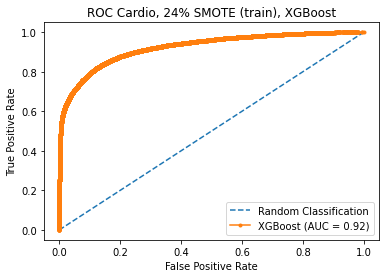

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.785


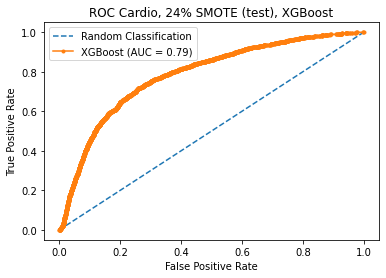

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     8800
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     9207
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    9207
Name: cardio, dtype: int64

In [40]:
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [41]:
train_df_0_med = tvae_result_df_0.sample(n = 15000)

In [42]:
train_df_med = train_df_0_med.append(tvae_result_df_1)
train_df_med['cardio'].value_counts()

0    15000
1     9207
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(train_df_med)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_med,samples])
tvae_result_df['cardio'].value_counts()

0    15000
1    11701
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(12000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    15000
1    11880
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(12500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    15000
1    13079
Name: cardio, dtype: int64

In [46]:
train_df_0_med = tvae_result_df_0.sample(n = 20000)
tvae_result_df_1_1 = tvae_result_df2[tvae_result_df2['cardio'] == 1]
train_df_med_2 = tvae_result_df_1_1.append(train_df_0_med)
train_df_med_2['cardio'].value_counts()

0    20000
1    13079
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(train_df_med_2)
# Once trained generate samples
samples = tvae.sample(17500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([train_df_med_2,samples])
tvae_result_df3['cardio'].value_counts()

0    20000
1    18889
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(17500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

1    20135
0    20000
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(19000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

1    27088
0    20000
Name: cardio, dtype: int64

In [51]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

1    34697
0    20000
Name: cardio, dtype: int64

In [52]:
tvae_res1 = tvae_result_df6[tvae_result_df6['cardio'] == 1]
train_df_1_bal = tvae_res1.sample(n = 27743)
train_df_1_bal['cardio'].value_counts()

1    27743
Name: cardio, dtype: int64

In [53]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

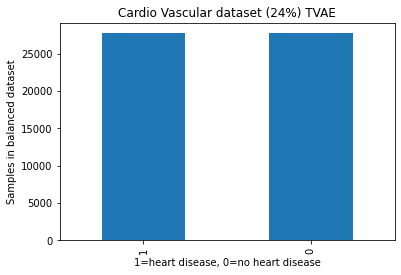

In [54]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (24%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [55]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [56]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70     27743
           1       0.71      0.62      0.66     27743

    accuracy                           0.68     55486
   macro avg       0.69      0.68      0.68     55486
weighted avg       0.69      0.68      0.68     55486



In [57]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      6936
           1       0.37      0.48      0.42      2200

    accuracy                           0.68      9136
   macro avg       0.59      0.61      0.60      9136
weighted avg       0.71      0.68      0.69      9136



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.752


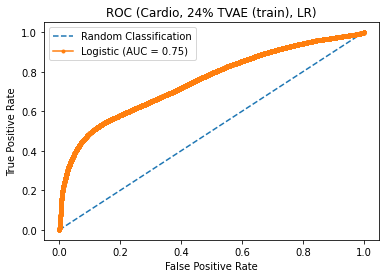

In [58]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.671


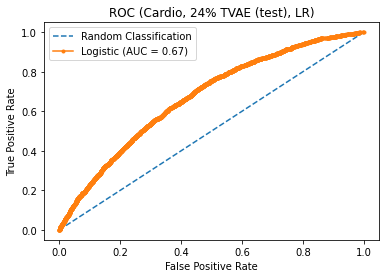

In [59]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [60]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     27743
           1       0.95      0.77      0.85     27743

    accuracy                           0.86     55486
   macro avg       0.88      0.86      0.86     55486
weighted avg       0.88      0.86      0.86     55486



In [61]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      6936
           1       0.56      0.20      0.30      2200

    accuracy                           0.77      9136
   macro avg       0.67      0.58      0.58      9136
weighted avg       0.73      0.77      0.73      9136



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.936


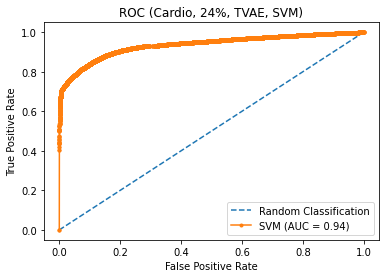

In [62]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.751


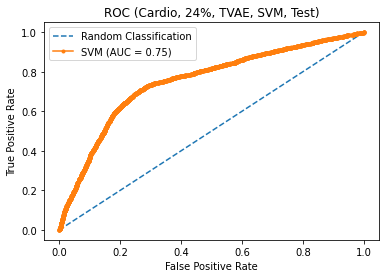

In [63]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [64]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.15224	validation_0-logloss:0.64103	validation_1-error:0.19801	validation_1-logloss:0.65918
[1]	validation_0-error:0.15224	validation_0-logloss:0.59855	validation_1-error:0.19801	validation_1-logloss:0.63124
[2]	validation_0-error:0.15671	validation_0-logloss:0.56337	validation_1-error:0.20436	validation_1-logloss:0.60918
[3]	validation_0-error:0.15595	validation_0-logloss:0.53297	validation_1-error:0.20447	validation_1-logloss:0.58951
[4]	validation_0-error:0.15577	validation_0-logloss:0.50761	validation_1-error:0.20447	validation_1-logloss:0.57262
[5]	validation_0-error:0.15285	validation_0-logloss:0.48541	validation_1-error:0.20447	validation_1-logloss:0.55844
[6]	validation_0-error:0.14980	validation_0-logloss:0.46546	validation_1-error:0.20359	validation_1-logloss:0.54566
[7]	validation_0-error:0.14944	validation_0-logloss:0.44898	validation_1-error:0.20304	validation_1-logloss:0.53513
[8]	validation_0-error:0.14813	validation_0-logloss:0.43373	validation_1

[71]	validation_0-error:0.11927	validation_0-logloss:0.27301	validation_1-error:0.20228	validation_1-logloss:0.44526
[72]	validation_0-error:0.11920	validation_0-logloss:0.27258	validation_1-error:0.20250	validation_1-logloss:0.44517
[73]	validation_0-error:0.11915	validation_0-logloss:0.27247	validation_1-error:0.20228	validation_1-logloss:0.44510
[74]	validation_0-error:0.11906	validation_0-logloss:0.27233	validation_1-error:0.20250	validation_1-logloss:0.44501
[75]	validation_0-error:0.11882	validation_0-logloss:0.27208	validation_1-error:0.20261	validation_1-logloss:0.44493
[76]	validation_0-error:0.11846	validation_0-logloss:0.27168	validation_1-error:0.20239	validation_1-logloss:0.44493
[77]	validation_0-error:0.11835	validation_0-logloss:0.27143	validation_1-error:0.20217	validation_1-logloss:0.44496
[78]	validation_0-error:0.11837	validation_0-logloss:0.27102	validation_1-error:0.20250	validation_1-logloss:0.44475
[79]	validation_0-error:0.11837	validation_0-logloss:0.27093	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     27743
           1       0.92      0.85      0.88     27743

    accuracy                           0.88     55486
   macro avg       0.89      0.88      0.88     55486
weighted avg       0.89      0.88      0.88     55486



In [66]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6936
           1       0.62      0.42      0.50      2200

    accuracy                           0.80      9136
   macro avg       0.72      0.67      0.69      9136
weighted avg       0.78      0.80      0.78      9136



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.947


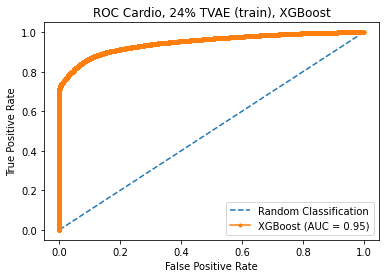

In [67]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.794


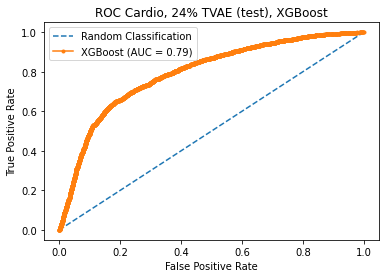

In [68]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [69]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(5000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    1475
Name: cardio, dtype: int64

In [70]:
df_train_ctgan = df_train.append(samples)

In [71]:
ctgan.fit(df_train_ctgan, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(5000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    1353
Name: cardio, dtype: int64

In [72]:
df_train_ctgan1 = df_train_ctgan.append(samples1)

In [73]:
ctgan.fit(df_train_ctgan1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(5000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    1760
Name: cardio, dtype: int64

In [74]:
df_train_ctgan2 = df_train_ctgan1.append(samples2)
df_train_ctgan2['cardio'].value_counts()

0    27743
1    13388
Name: cardio, dtype: int64

In [75]:
ctgan.fit(df_train_ctgan2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(11000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    2978
Name: cardio, dtype: int64

In [76]:
df_train_ctgan3 = df_train_ctgan2.append(samples3)
df_train_ctgan3['cardio'].value_counts()

0    27743
1    16366
Name: cardio, dtype: int64

In [77]:
ctgan.fit(df_train_ctgan3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(16000)
samples4 = samples4[samples4['cardio'] ==1.0]
samples4['cardio'].value_counts()

1    5596
Name: cardio, dtype: int64

In [78]:
df_train_ctgan4 = df_train_ctgan3.append(samples4)
df_train_ctgan4['cardio'].value_counts()

0    27743
1    21962
Name: cardio, dtype: int64

In [79]:
ctgan.fit(df_train_ctgan4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples5 = ctgan.sample(20000)
samples5 = samples5[samples5['cardio'] ==1.0]
samples5['cardio'].value_counts()

1    9426
Name: cardio, dtype: int64

In [80]:
df_train_ctgan5 = df_train_ctgan4.append(samples5)
df_train_ctgan5['cardio'].value_counts()

1    31388
0    27743
Name: cardio, dtype: int64

In [81]:
samples1 = df_train_ctgan5[df_train_ctgan5['cardio'] ==1.0]
samples0 = df_train_ctgan5[df_train_ctgan5['cardio'] ==0.0]

In [82]:
df_train_bal = samples1.sample(n = 27743)
df_train_bal = df_train_bal.append(samples0)

In [83]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [84]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [85]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72     27743
           1       0.73      0.68      0.70     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [86]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      6936
           1       0.44      0.65      0.52      2200

    accuracy                           0.72      9136
   macro avg       0.65      0.69      0.66      9136
weighted avg       0.77      0.72      0.73      9136



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.769


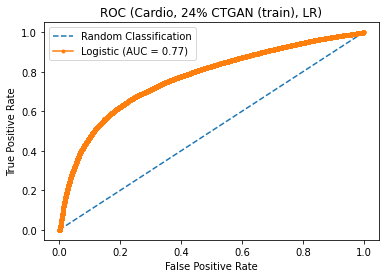

In [87]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


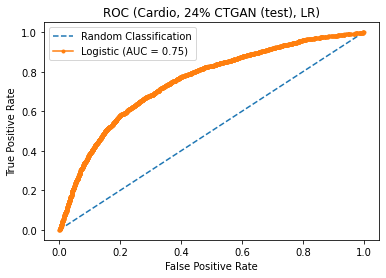

In [88]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [89]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     27743
           1       0.80      0.73      0.76     27743

    accuracy                           0.77     55486
   macro avg       0.78      0.77      0.77     55486
weighted avg       0.78      0.77      0.77     55486



In [90]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6936
           1       0.51      0.62      0.56      2200

    accuracy                           0.76      9136
   macro avg       0.69      0.71      0.70      9136
weighted avg       0.78      0.76      0.77      9136



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.838


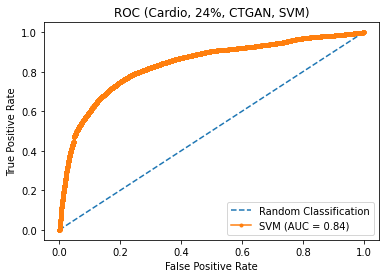

In [91]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.770


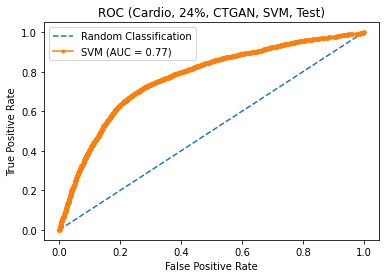

In [92]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 24%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [93]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22267	validation_0-logloss:0.65806	validation_1-error:0.23117	validation_1-logloss:0.66500
[1]	validation_0-error:0.22065	validation_0-logloss:0.62934	validation_1-error:0.23478	validation_1-logloss:0.64196
[2]	validation_0-error:0.21944	validation_0-logloss:0.60611	validation_1-error:0.23533	validation_1-logloss:0.62279
[3]	validation_0-error:0.21362	validation_0-logloss:0.58470	validation_1-error:0.21891	validation_1-logloss:0.60603
[4]	validation_0-error:0.21182	validation_0-logloss:0.56181	validation_1-error:0.22012	validation_1-logloss:0.58962
[5]	validation_0-error:0.21346	validation_0-logloss:0.54764	validation_1-error:0.21891	validation_1-logloss:0.57797
[6]	validation_0-error:0.20185	validation_0-logloss:0.52918	validation_1-error:0.22417	validation_1-logloss:0.56534
[7]	validation_0-error:0.18664	validation_0-logloss:0.51192	validation_1-error:0.21946	validation_1-logloss:0.55364
[8]	validation_0-error:0.18752	validation_0-logloss:0.50098	validation_1

[71]	validation_0-error:0.14198	validation_0-logloss:0.33966	validation_1-error:0.20764	validation_1-logloss:0.46627
[72]	validation_0-error:0.14195	validation_0-logloss:0.33939	validation_1-error:0.20753	validation_1-logloss:0.46622
[73]	validation_0-error:0.14195	validation_0-logloss:0.33910	validation_1-error:0.20775	validation_1-logloss:0.46616
[74]	validation_0-error:0.14173	validation_0-logloss:0.33861	validation_1-error:0.20775	validation_1-logloss:0.46613
[75]	validation_0-error:0.14164	validation_0-logloss:0.33829	validation_1-error:0.20797	validation_1-logloss:0.46612
[76]	validation_0-error:0.14148	validation_0-logloss:0.33807	validation_1-error:0.20808	validation_1-logloss:0.46623
[77]	validation_0-error:0.14122	validation_0-logloss:0.33731	validation_1-error:0.20808	validation_1-logloss:0.46629
[78]	validation_0-error:0.14083	validation_0-logloss:0.33615	validation_1-error:0.20808	validation_1-logloss:0.46612
[79]	validation_0-error:0.14090	validation_0-logloss:0.33567	val

[141]	validation_0-error:0.13603	validation_0-logloss:0.31913	validation_1-error:0.20928	validation_1-logloss:0.46490
CPU times: user 11.4 s, sys: 222 ms, total: 11.7 s
Wall time: 7.34 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     27743
           1       0.88      0.84      0.86     27743

    accuracy                           0.86     55486
   macro avg       0.86      0.86      0.86     55486
weighted avg       0.86      0.86      0.86     55486



In [95]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6936
           1       0.57      0.52      0.54      2200

    accuracy                           0.79      9136
   macro avg       0.71      0.70      0.70      9136
weighted avg       0.78      0.79      0.79      9136



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.932


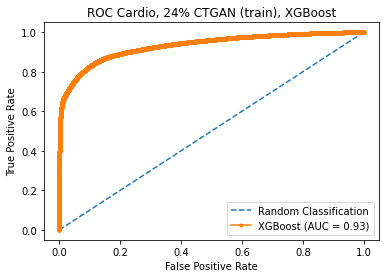

In [96]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.786


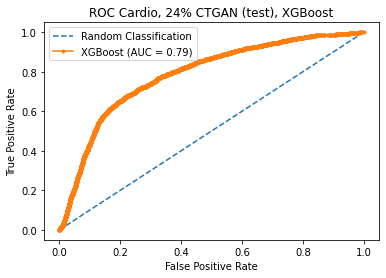

In [97]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 24% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()